In [1]:
import mne
import os
import scipy.io
import listen_italian_functions
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import pickle
import warnings
warnings.filterwarnings('ignore')
from tqdm import tnrange, tqdm_notebook

data_path = os.path.dirname(os.path.dirname(os.getcwd()))

subject_name = ['Alice','Andrea','Daniel','Elena','Elenora','Elisa','Federica','Francesca','Gianluca1','Giada','Giorgia',
                'Jonluca','Laura','Leonardo','Linda','Lucrezia','Manu','Marco','Martina','Pagani','Pasquale','Sara',
                'Silvia','Silvia2','Tommaso']
subject_name = ['Alice','Andrea','Daniel','Elena','Elenora','Elisa','Federica','Francesca','Gianluca1','Giada','Giorgia',
                'Jonluca','Laura','Leonardo','Linda','Lucrezia','Manu','Marco','Martina','Pagani','Pasquale',
                'Silvia','Silvia2','Tommaso']

# epoching and saving

In [16]:
# extract trials of tmax second and remove the wrong answer trials and seperate them in three conditions
Tmin = 0
Tmax = 4.51
trial_len = 3

for s in subject_name:
    raw_fname = data_path + '/analysis/python/data/'+s+'_raw.fif'
    raw = mne.io.read_raw_fif(raw_fname,preload=True)
    raw_fname = data_path + '/analysis/behaviour/data/subject/'+s+'_behaviour.mat'
    mat = scipy.io.loadmat(raw_fname)
    epochs = listen_italian_functions.epoch(raw, mat,Tmin, Tmax)
    save_path = data_path + '/analysis/python/data/'+s+'-coh-epo-'+str(Tmin)+'-'+str(Tmax)+'-trialLen-'+str(trial_len)+'.fif'
    epochs.save(save_path)
    print('----------------------------------------------------------------------------------------------------------------'+s)



Opening raw data file D:\projects\current\listen_italian_motor_entrainment\analysis\python\data\Silvia_raw.fif...
    Range : 39578 ... 1131726 =     39.578 ...  1131.726 secs
Ready.
Reading 0 ... 1092148  =      0.000 ...  1092.148 secs...
800 events found
Event IDs: [100 105 106 200]
200 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169

# Read the epoches

In [2]:
Tmin = 0
Tmax = 4.51
trial_len = 3
remove_first = 0.5 #seconds

GA_epoches = []
for s in subject_name:
    save_path = data_path + '/analysis/python/data/'+s+'-coh-epo-'+str(Tmin)+'-'+str(Tmax)+'-trialLen-'+str(trial_len)+'.fif'
    epochs = mne.read_epochs(save_path)
    GA_epoches.append(epochs)
    print('----------------------------------------------------------------------------------------------------------------'+s)


This filename (D:\projects\current\listen_italian_motor_entrainment/analysis/python/data/Alice-coh-epo-0-4.51-trialLen-3.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif or -epo.fif.gz
Reading D:\projects\current\listen_italian_motor_entrainment/analysis/python/data/Alice-coh-epo-0-4.51-trialLen-3.fif ...
Isotrak not found
    Found the data of interest:
        t =       0.00 ...    4507.50 ms
        0 CTF compensation matrices available
70 matching events found
No baseline correction applied
70 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
----------------------------------------------------------------------------------------------------------------Alice
This filename (D:\projects\current\listen_italian_motor_entrainment/analysis/python/data/Andrea-coh-epo-0-4.51-trialLen-3.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif or -epo.fif.gz
Readin

        0 CTF compensation matrices available
67 matching events found
No baseline correction applied
67 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
----------------------------------------------------------------------------------------------------------------Giorgia
This filename (D:\projects\current\listen_italian_motor_entrainment/analysis/python/data/Jonluca-coh-epo-0-4.51-trialLen-3.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif or -epo.fif.gz
Reading D:\projects\current\listen_italian_motor_entrainment/analysis/python/data/Jonluca-coh-epo-0-4.51-trialLen-3.fif ...
Isotrak not found
    Found the data of interest:
        t =       0.00 ...    4507.50 ms
        0 CTF compensation matrices available
59 matching events found
No baseline correction applied
59 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
--------------------

This filename (D:\projects\current\listen_italian_motor_entrainment/analysis/python/data/Silvia-coh-epo-0-4.51-trialLen-3.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif or -epo.fif.gz
Reading D:\projects\current\listen_italian_motor_entrainment/analysis/python/data/Silvia-coh-epo-0-4.51-trialLen-3.fif ...
Isotrak not found
    Found the data of interest:
        t =       0.00 ...    4507.50 ms
        0 CTF compensation matrices available
66 matching events found
No baseline correction applied
66 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
----------------------------------------------------------------------------------------------------------------Silvia
This filename (D:\projects\current\listen_italian_motor_entrainment/analysis/python/data/Silvia2-coh-epo-0-4.51-trialLen-3.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif or -epo.fif.gz
Re

In [3]:
condition = ['Hyper','Normal','Hypo']
frames = []
for s in range(0,len(subject_name)):
    df = pd.DataFrame({'Condition':'Hyper','Subject':subject_name[s],'noTrials':GA_epoches[s]['hyper'].get_data().shape[0]},index=[s])
    df = df.append(pd.DataFrame({'Condition':'Normal','Subject':subject_name[s],'noTrials':GA_epoches[s]['normal'].get_data().shape[0]},index=[s]))
    df = df.append(pd.DataFrame({'Condition':'Hypo','Subject':subject_name[s],'noTrials':GA_epoches[s]['hypo'].get_data().shape[0]},index=[s]))
    frames.append(df)
    
data=pd.concat((frames),axis=0)

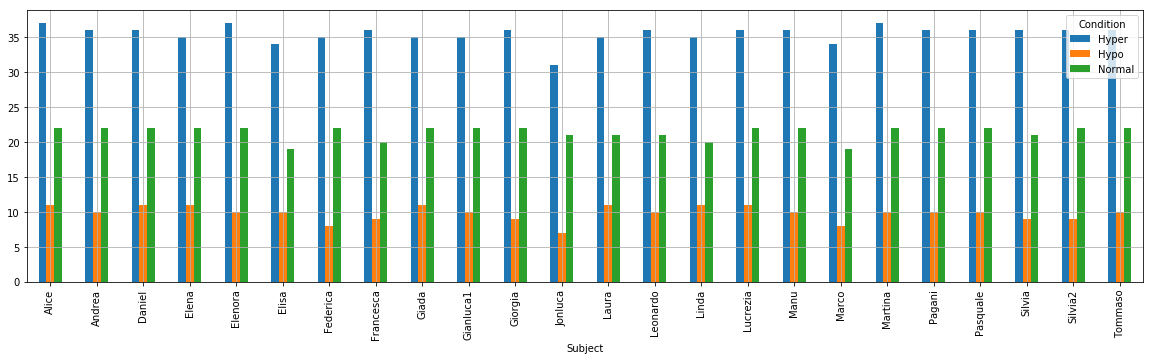

In [4]:
a=data.groupby(['Subject','Condition']).sum()['noTrials'].unstack().plot(kind='bar',figsize=(20,5),grid=True)

# Measuring the coherence

In [ ]:
# let's explore some frequency bands
iter_freqs = [
    ('Delta', 1, 3),
    ('Theta', 4, 7),
    ('Alpha', 8, 12),
    ('Beta', 13, 25),
    ('Gamma', 30, 40)
]
features = ['envelop','jawaopening','lipaparature','lipProtrusion','TTCD','TMCD','TBCD']
condition = ['Hyper','Normal','Hypo']
delay = np.arange(0,1.1,0.1)
indices = (np.repeat([np.arange(59,len(features)+59)],59),np.tile(np.arange(0,59),len(features)))   


extra_channels = ['envelop','jawaopening','lipaparature','lipProtrusion','TTCD','TMCD','TBCD']
eeg_channles = np.setdiff1d(GA_epoches[0].ch_names, extra_channels)
event_id = {'hyper': 1,'normal': 2,'hypo': 3}
ch_types = np.repeat('eeg', len(features)+59)
ch_names = np.hstack((eeg_channles,features))        
info = mne.create_info(ch_names = ch_names.tolist(),ch_types = ch_types,sfreq = GA_epoches[s].info['sfreq'])
ch_names = np.setdiff1d(extra_channels,features)
        
for s in tqdm_notebook(range(0,len(subject_name)), desc='Subjects'):
    frames = []
    for d in tqdm_notebook(delay, desc='Delay'):        

        epoch = listen_italian_functions.coherence_preprocess_delay(GA_epoches[s],remove_first,d,trial_len,
                                                                    extra_channels,eeg_channles,info,ch_names,event_id)

        
        for band, fmin, fmax in iter_freqs:
            a = band+ ' '+str(fmin)+' - '+str(fmax)+'Hz'                
            hyper, freqs, times, n_epochs, n_tapers = listen_italian_functions.coherence_measure(epoch['hyper'],fmin, fmax,indices)
            normal, freqs, times, n_epochs, n_tapers = listen_italian_functions.coherence_measure(epoch['normal'],fmin, fmax,indices)
            hypo, freqs, times, n_epochs, n_tapers = listen_italian_functions.coherence_measure(epoch['hypo'],fmin, fmax,indices)
            allC, freqs, times, n_epochs, n_tapers = listen_italian_functions.coherence_measure(epoch,fmin, fmax,indices)

            hyper = np.split(hyper, len(features))
            normal = np.split(normal, len(features))
            hypo = np.split(hypo, len(features))
            allC = np.split(allC, len(features))

            for f in range(0,len(features)):
                feature = features[f]
                df = pd.DataFrame({'Condition':'Hyper','Freq':a,'Delay':d,'Feature':feature,
                                           'noTrials':GA_epoches[s]['hyper'].get_data().shape[0],
                                           'Subject':subject_name[s],'Data':[hyper[f].flatten()]})
                df = df.append(pd.DataFrame({'Condition':'Normal','Freq':a,'Delay':d,'Feature':feature,
                                             'noTrials':GA_epoches[s]['normal'].get_data().shape[0],
                                             'Subject':subject_name[s],'Data':[normal[f].flatten()]}))
                df = df.append(pd.DataFrame({'Condition':'Hypo','Freq':a,'Delay':d,'Feature':feature,
                                             'noTrials':GA_epoches[s]['hypo'].get_data().shape[0],
                                             'Subject':subject_name[s],'Data':[hypo[f].flatten()]}))
                df = df.append(pd.DataFrame({'Condition':'All','Freq':a,'Delay':d,'Feature':feature,
                                             'noTrials':GA_epoches[s].get_data().shape[0],
                                             'Subject':subject_name[s],'Data':[allC[f].flatten()]}))
                frames.append(df)
        print(d)
        
    data=pd.concat((frames),axis=0)
    save_path = data_path + '/analysis/python/data/coherence-trialLen-'+str(trial_len)+'-removedFirst-'+str(remove_first)+'s-'+subject_name[s]
    data.to_pickle(save_path)

HBox(children=(IntProgress(value=0, description='Subjects', max=24), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Delay', max=11), HTML(value='')))

70 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
Connectivity computation...
    computing connectivity for 413 connections
    using t=0.000s..3.000s for estimation (1201 points)
fmin=1.000 Hz corresponds to 3.002 < 5 cycles based on the epoch length 3.002 sec, need at least 5.000 sec epochs or fmin=1.665. Spectrum estimate will be unreliable.
    frequencies: 1.3Hz..3.0Hz (6 points)
    connectivity scores will be averaged for each band
    using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Coherence
    computing connectivity for epoch 1
    computing connectivity for epoch 2
    computing connectivity for epoch 3
    computing connectivity for epoch 4
    computing connectivity for epoch 5
    computing connectivity for epoch 6
    computing connectivity for epoch 7
    computing connectivity for epoch 8
